In [6]:
%matplotlib notebook

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import numpy as np

<IPython.core.display.Javascript object>


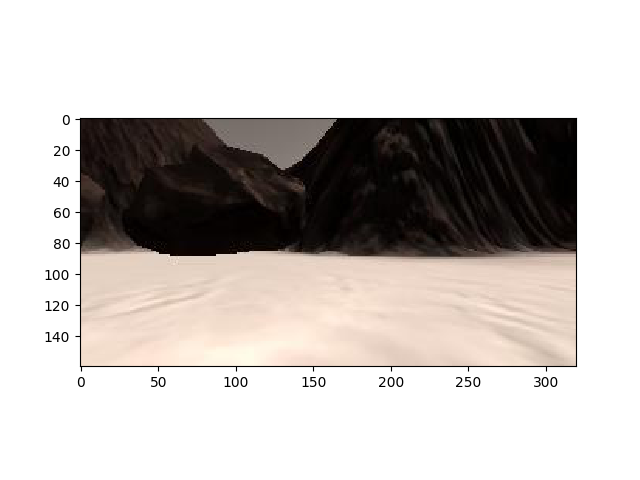

In [14]:
golden_rock_fn = 'boulder2.jpg'
# image = mpimg.imread('example_grid1.jpg')
image = mpimg.imread(golden_rock_fn)
plt.imshow(image)
plt.show()

In [3]:
# source points
lowerLeft = np.array([12.9879, 138.94])
lowerRight = np.array([302.665, 138.94])
upperLeft = np.array([117.432, 95.6456])
upperRight = np.array([199.154, 95.6456])

baseOffset = 3

# destination points
dll = lowerLeft - np.array([baseOffset, baseOffset*30])
dul = upperLeft + np.array([upperLeft[0] - dll[0], baseOffset*30])
dlr = lowerRight - np.array([baseOffset, baseOffset*30])
dur = upperRight + np.array([upperRight[0] - dlr[0], baseOffset*30])

lowerLeft = [12, 140]
upperLeft = [118, 96]
lowerRight = [305, 140]
upperRight = [200, 96]

dll = [160, 155]
dul = [160, 135]
dlr = [180, 155]
dur = [180, 135]


In [143]:
def perspect_transform(img, src, dst):
    # Get the transform matrix using cv2.getPerspectiveTransform()
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp image using cv2.warpPerspective()
    # Keep same size as input image
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    return warped

<IPython.core.display.Javascript object>


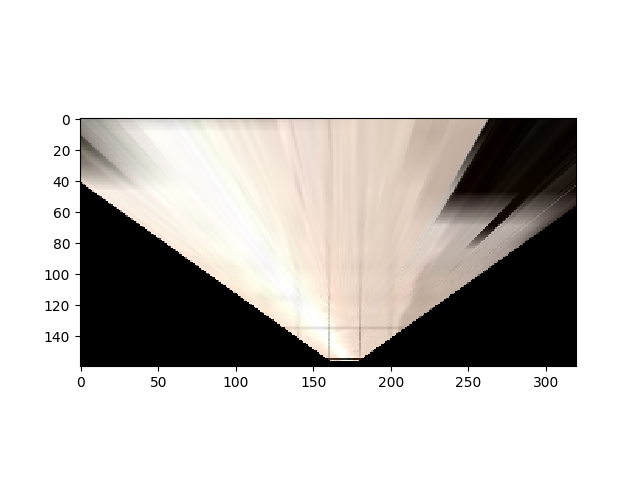

In [144]:
source = np.float32([lowerLeft,
                     lowerRight,
                     upperRight,
                     upperLeft])
destination = np.float32([dll,
                          dlr,
                          dur,
                          dul])
warped = perspect_transform(image, source, destination)
plt.imshow(warped)
plt.show()